In [319]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv
/kaggle/input/graduate-admissions/Admission_Predict.csv


In [320]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [321]:
data = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict.csv')

In [322]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Checking for Null Values**

In [323]:
data.drop('Serial No.',1,inplace = True)

In [324]:
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

GRE Score
False    400
Name: GRE Score, dtype: int64

TOEFL Score
False    400
Name: TOEFL Score, dtype: int64

University Rating
False    400
Name: University Rating, dtype: int64

SOP
False    400
Name: SOP, dtype: int64

LOR 
False    400
Name: LOR , dtype: int64

CGPA
False    400
Name: CGPA, dtype: int64

Research
False    400
Name: Research, dtype: int64

Chance of Admit 
False    400
Name: Chance of Admit , dtype: int64



*No Null or empty or missing Data*

# Exploratory Data Analysis

In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [326]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Corelation Between GRE Score and TOEFL score

Text(0.5, 1.0, 'GRE Score vs TOEFL Score')

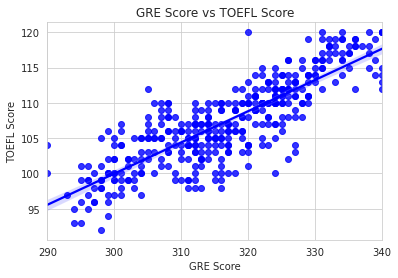

In [327]:
sb.set_style('whitegrid')
sb.set_palette('pastel')
sb.regplot(data['GRE Score'],data['TOEFL Score'],color='blue')
plt.title('GRE Score vs TOEFL Score')

As Gre Score increases Toefel score increases. 

Relation between GRE score and Chance of admission

Text(0.5, 1.0, 'GRE Score vs Chance of Admit')

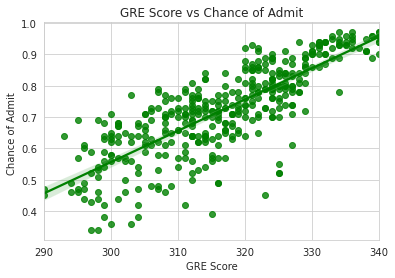

In [328]:
sb.regplot(data['GRE Score'],data['Chance of Admit '],color='green')
plt.title('GRE Score vs Chance of Admit')

As GRE Score increases Chance of Admit also increases. Therefore as TOEFL Score increases admission chances increases

Analysis of University Rating

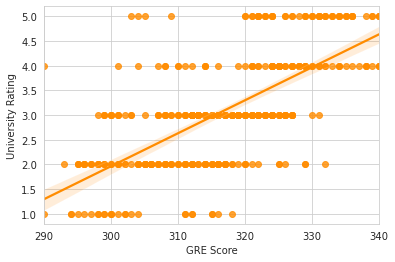

In [329]:
sb.regplot(data['GRE Score'],data['University Rating'],color='darkorange')


With higher GRE grades Chances of Admission in a higher rated college is higher

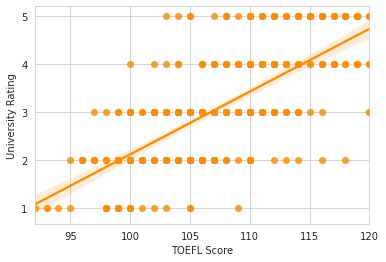

In [330]:
sb.regplot(data['TOEFL Score'],data['University Rating'],color='darkorange')

University Rating vs Chance of Admission

Text(0.5, 1.0, 'University Rating = 1')

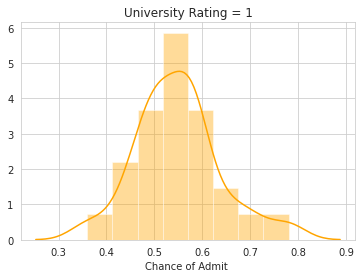

In [331]:
sb.distplot(data.loc[data['University Rating'] == 1,'Chance of Admit '],color = 'orange')
plt.title('University Rating = 1')

Text(0.5, 1.0, 'University Rating = 2')

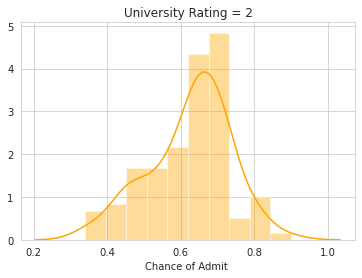

In [332]:
sb.distplot(data.loc[data['University Rating'] == 2,'Chance of Admit '],color = 'orange')
plt.title('University Rating = 2')

Text(0.5, 1.0, 'University Rating = 3')

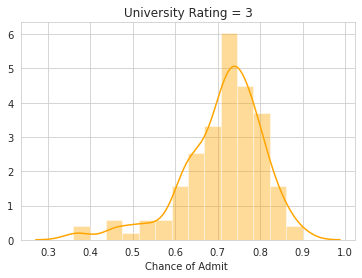

In [333]:
sb.distplot(data.loc[data['University Rating'] == 3,'Chance of Admit '],color = 'orange')
plt.title('University Rating = 3')

Text(0.5, 1.0, 'University Rating = 4')

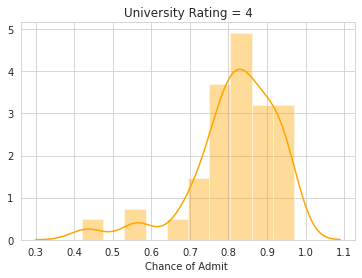

In [334]:
sb.distplot(data.loc[data['University Rating'] == 4,'Chance of Admit '],color = 'orange')
plt.title('University Rating = 4')

Text(0.5, 1.0, 'University Rating = 5')

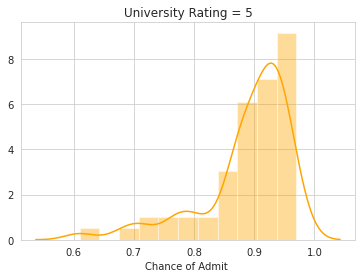

In [335]:
sb.distplot(data.loc[data['University Rating'] == 5,'Chance of Admit '],color = 'orange')
plt.title('University Rating = 5')

# **Corelation Graph**

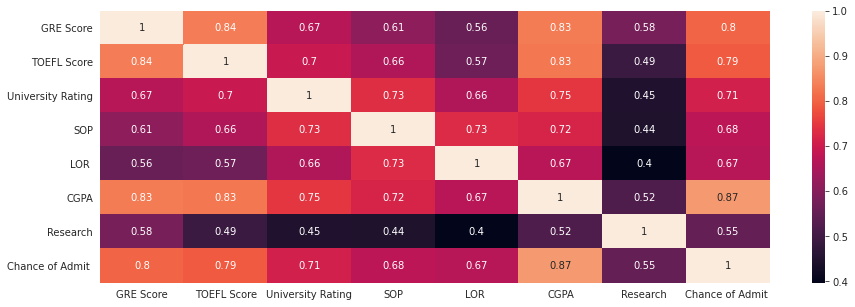

In [336]:
plt.figure(figsize = (15,5))
sb.heatmap(data.corr(),annot=True)

Here every independent variable is strongly corelated with the dependent variable

# **Model Selection**

In [337]:
y = data['Chance of Admit ']
data.drop(['Chance of Admit '],1,inplace = True)
X = data

In [338]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR


In [339]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

**Linear Regression**

In [340]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [341]:
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

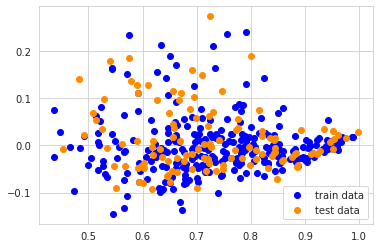

In [342]:

plt.scatter(y_train_pred,y_train_pred-y_train,c='blue')
plt.scatter(y_test_pred,y_test_pred-y_test,c='darkorange')
plt.legend(labels = ('train data','test data'),loc = 'lower right')


In [343]:
print("Coefficients:",model1.coef_)
print('Intercept:',model1.intercept_)

Coefficients: [0.00183981 0.00317072 0.00486626 0.00099469 0.0136946  0.11781823
 0.01843913]
Intercept: -1.2841780563001732


In [344]:
print("Insample Score: ",model1.score(X_train,y_train))
print("Outsample Score: ",model1.score(X_test,y_test))

Insample Score:  0.8019807331500792
Outsample Score:  0.7955991554684618


Linear Regression Model Does a pretty good job about understanding the model in both in sample and outsample. No underfitting or OverFitting seen 

Lasso Regression

In [345]:
model2 = Lasso(alpha = 0.001)
model2.fit(X_train,y_train)

Lasso(alpha=0.001)

In [346]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

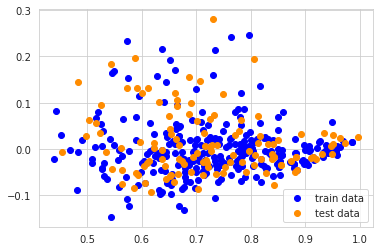

In [347]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='blue')
plt.scatter(y_test_pred,y_test_pred-y_test,c='darkorange')
plt.legend(labels = ('train data','test data'),loc = 'lower right')

In [348]:
print("Coefficients:",model2.coef_)
print('Intercept:',model2.intercept_)

Coefficients: [0.00225429 0.00355472 0.0049359  0.00088372 0.01434116 0.10704308
 0.01259304]
Intercept: -1.3630620743270079


In [349]:
print("Insample Score: ",model2.score(X_train,y_train))
print("Outsample Score: ",model2.score(X_test,y_test))

Insample Score:  0.8011845364295122
Outsample Score:  0.7917549364948834


Elastic Net

In [350]:
model3 = ElasticNet(alpha = 0.001)
model3.fit(X_train,y_train)

ElasticNet(alpha=0.001)

In [351]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

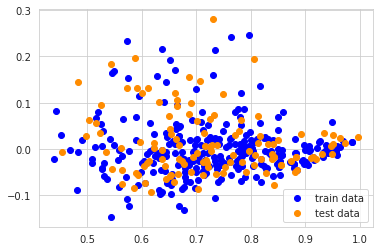

In [352]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='blue')
plt.scatter(y_test_pred,y_test_pred-y_test,c='darkorange')
plt.legend(labels = ('train data','test data'),loc = 'lower right')

In [353]:
print("Coefficients:",model2.coef_)
print('Intercept:',model2.intercept_)

Coefficients: [0.00225429 0.00355472 0.0049359  0.00088372 0.01434116 0.10704308
 0.01259304]
Intercept: -1.3630620743270079


In [354]:
print("Insample Score: ",model3.score(X_train,y_train))
print("Outsample Score: ",model3.score(X_test,y_test))

Insample Score:  0.8017457922512359
Outsample Score:  0.7938146126231946


SupprtVectorRegressor

In [355]:
model4 = SVR(kernel='poly')
model4.fit(X_train,y_train)

SVR(kernel='poly')

In [356]:
y_train_pred = model4.predict(X_train)
y_test_pred = model4.predict(X_test)

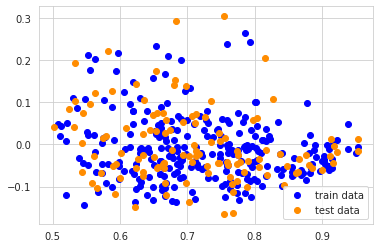

In [357]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='blue')
plt.scatter(y_test_pred,y_test_pred-y_test,c='darkorange')
plt.legend(labels = ('train data','test data'),loc = 'lower right')

In [358]:
print("Insample Score: ",model4.score(X_train,y_train))
print("Outsample Score: ",model4.score(X_test,y_test))


Insample Score:  0.6930930678570492
Outsample Score:  0.6673050345094547


Decision Tree Regressor

In [359]:
model5 = DecisionTreeRegressor(max_depth=2)
model5.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [360]:
y_train_pred = model5.predict(X_train)
y_test_pred = model5.predict(X_test)

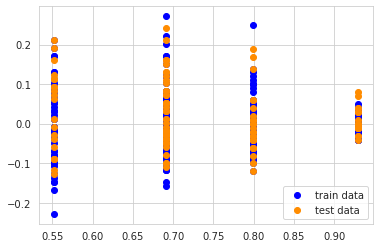

In [361]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='blue')
plt.scatter(y_test_pred,y_test_pred-y_test,c='darkorange')
plt.legend(labels = ('train data','test data'),loc = 'lower right')

In [362]:
print("Insample Score: ",model5.score(X_train,y_train))
print("Outsample Score: ",model5.score(X_test,y_test))

Insample Score:  0.7215232028861631
Outsample Score:  0.7175043829398744


Random Forest Regressor

In [363]:
model6 = RandomForestRegressor(n_estimators=100,criterion='mse',n_jobs = -1)
model6.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [364]:
y_train_pred = model6.predict(X_train)
y_test_pred = model6.predict(X_test)

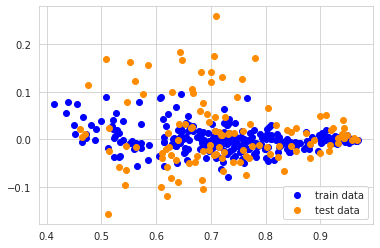

In [365]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='blue')
plt.scatter(y_test_pred,y_test_pred-y_test,c='darkorange')
plt.legend(labels = ('train data','test data'),loc = 'lower right')

In [366]:
print("Insample Score: ",model6.score(X_train,y_train))
print("Outsample Score: ",model6.score(X_test,y_test))

Insample Score:  0.9635292944021385
Outsample Score:  0.7700576929647728


ADA BOOST REGRESSOR

In [367]:
model7 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2),n_estimators=600)

In [368]:
model7.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                  n_estimators=600)

In [369]:
y_train_pred = model7.predict(X_train)
y_test_pred = model7.predict(X_test)

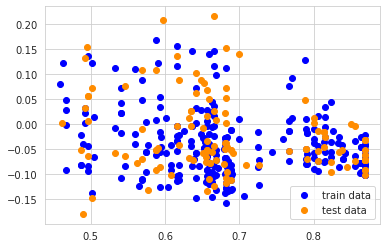

In [370]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='blue')
plt.scatter(y_test_pred,y_test_pred-y_test,c='darkorange')
plt.legend(labels = ('train data','test data'),loc = 'lower right')

In [371]:
print("Insample Score: ",model7.score(X_train,y_train))
print("Outsample Score: ",model7.score(X_test,y_test))

Insample Score:  0.7026529308980094
Outsample Score:  0.7315536644510952


Linear Regression fits the model Best Thus Linear regression is the model that we require

# **Model Development**

In [372]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
gre_score = int(input("Enter GRE Score: "))
toefl_score = int(input("Enter TOEFL Score: "))
university_rating = int(input("Enter University Rating(1-5): "))
sop = float(input("Enter SOP: "))
lor = float(input("Enter LOR: "))
cgpa = float(input("Enter CGPA: "))
Research = int(input("Have you done any Research(0=no,1=yes): "))
params = [[gre_score,toefl_score,university_rating,sop,lor,cgpa,Research]]
for i,chance_of_admit in enumerate(model.predict(params)):
    print("Chance of Admission are:",chance_of_admit )
